### [**Write SQL in Python**]

https://www.analyticsvidhya.com/blog/2021/07/pandasql-best-way-to-run-sql-queries-and-codes-in-jupyter-notebook-using-python/


---







In [34]:
import os
import pandas as pd
import seaborn as sns

In [35]:
# Add files in a list
path = ".\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [36]:
# append all files
all_sales = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_sales = pd.concat([all_sales, current_data])
    
all_sales.to_csv("all_sales.csv", index=False)
    

In [37]:
all_sales = pd.read_csv("all_sales.csv")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [38]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [39]:
nan_df = all_sales[all_sales.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
all_sales = all_sales.dropna(how='all')
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [41]:
# 
(all_sales['Order Date'].str[0:2]=='Or').value_counts()

False    185950
True        355
Name: Order Date, dtype: int64

In [42]:
all_sales = all_sales[all_sales['Order Date'].str[0:2]!='Or']
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [43]:
all_sales['Quantity Ordered'] = pd.to_numeric(all_sales['Quantity Ordered'])
all_sales['Price Each'] = pd.to_numeric(all_sales['Price Each'])

Add Month Column

In [44]:
all_sales['Month'] = pd.to_datetime(all_sales['Order Date']).dt.month
all_sales['Year'] = pd.to_datetime(all_sales['Order Date']).dt.year
# or use all_sales['Month2'] = all_sales['Order Date'].str[0:2]
# all_sales['Month'] = all_sales['Month'].astype('int32')



In [45]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019


Add City column

In [46]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)


In [59]:
# !!! remove spaces in columns name to avoid error later when we run SQL queries!
all_sales.columns = all_sales.columns.str.replace(' ','_')

In [60]:
all_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Year,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)


Analysis using SQL in Python

In [61]:
#!pip install -U pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [62]:
#run option 1
pysqldf("SELECT * FROM all_sales LIMIT 3;")

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Year,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)


In [67]:
# run option 2
q = """  
select *,(Quantity_Ordered *Price_Each) as Sales
FROM all_sales
;"""

In [71]:
df = pysqldf(q)
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Year,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,Boston (MA),99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA),600.00


Lets group by Month

In [121]:
q = """  
select Month,City, ROUND(SUM(Sales)) AS Sales
FROM df
GROUP BY Month,City
;"""
sales_by_month =pysqldf(q)
sales_by_month


,Month,City,Sales
0,1,Atlanta (GA),149160.0
1,1,Austin (TX),88087.0
2,1,Boston (MA),201088.0
3,1,Dallas (TX),143463.0
4,1,Los Angeles (CA),288602.0
...,...,...,...
115,12,New York City (NY),646771.0
116,12,Portland (ME),51966.0
117,12,Portland (OR),251748.0
118,12,San Francisco (CA),1106601.0


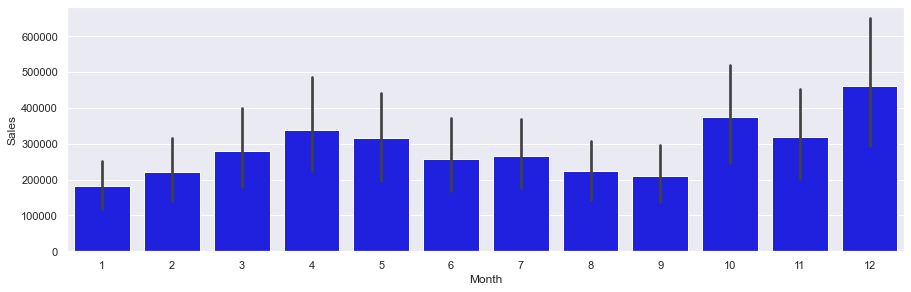

In [123]:
#sns.set_theme(style="darkgrid")
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,4.5)})
ax = sns.barplot(x="Month", y="Sales", data=sales_by_month,color='blue')  # ,order = [2, 1, 12], color='blue',  palette = 'colorblind'
